Faça o upload do arquivo data.pkl com os dados fornecidos para a atividade. Use a célula de comando abaixo após a finalização do upload para a preparação do conteúdo do arquivo no colab.

In [ ]:
import pickle
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import torch.nn as nn
import torch
from tqdm import trange
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import torch.nn.functional as F

In [ ]:
#=======================
# não altere essa célula
#=======================
with open('data.pkl', 'rb') as handle:
    dataset = pickle.load(handle)

training_data = list(zip(dataset['x'].astype(np.float32),dataset['y']))
test_data = list(zip(dataset['x_test'].astype(np.float32),dataset['y_test']))

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_data, batch_size=100, shuffle=False)

O dataset representa uma tarefa de classificação com 10 classes e é composto por um input sequencial com 40 float features e um output inteiro contendo o índice da classe de cada amostra (i.e. de 0 a 9).

In [ ]:
type(training_data)

list

In [ ]:
training_data[0]

(array([-0.33200568, -0.47191036, -0.7786971 , -1.0097408 , -0.8823526 ,
         0.10393481,  1.6432843 ,  1.6525071 ,  0.6830781 , -0.3426375 ,
        -1.5214309 , -1.103984  , -0.01709391,  1.014668  ,  0.6235863 ,
        -0.02391367,  0.25410828,  0.8673926 ,  0.9354101 ,  1.035874  ,
         1.593488  ,  1.2368417 ,  0.4101985 , -0.21979299,  0.09805559,
         0.5301637 ,  0.5202782 ,  0.18998057,  0.07043655,  0.32433057,
         0.26860833, -0.57907736, -1.0934857 , -0.86458045, -0.11352962,
         0.01950092, -0.32821417, -0.7167305 , -0.9619582 , -0.8901664 ],
       dtype=float32),
 2)

In [ ]:
len(training_data[0][0])

40

In [ ]:
for X, y in train_dataloader:
    print(f"Shape of X [N, L]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, L]: torch.Size([32, 40])
Shape of y: torch.Size([32]) torch.int64


In [ ]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


Altere as classes abaixo implementando os seguintes modelos:

1. modelo de classificação linear
2. mlp com no máximo 20k parâmetros (contando pesos e biases)
3. rede convolucional estilo LeNet
4. rede convolucional estilo VGG
5. rede convolucional estilo ResNet

(extra)
6. rede recorrente
7. rede estilo ViT

In [ ]:
# Define model LinearNet
class LinearNet(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

'''
1. Entrada de um vetor de tamanho input_size = 40 é alimentado na rede.
2. A entrada passa por uma única camada linear, que aplica uma transformação linear (multiplicação de matriz e adição de viés).
3. A camada linear produz um vetor de tamanho output_size, que é a saída final do modelo.
'''
#=============================================================================================================

#=============================================================================================================
# Define model MLPNet
class MLPNet(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MLPNet, self).__init__()
        self.hidden_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(input_size, hidden_sizes[0], bias=True))
        for i in range(1, len(hidden_sizes)):
            self.hidden_layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i], bias=True))
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size, bias=True)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = F.relu(layer(x))
        x = self.output_layer(x)
        return x
'''
1. Um vetor de tamanho input_size é alimentado na rede.
2. A entrada passa pela primeira camada linear, que a transforma em um vetor de tamanho hidden_sizes[0].
3. A função de ativação ReLU é aplicada à saída da primeira camada oculta.
4. O vetor passa sequencialmente por cada camada oculta subsequente, definida em hidden_sizes, com uma transformação linear seguida de ReLU em cada etapa.
5. A saída da última camada oculta é passada para a camada de saída linear, que a transforma em um vetor de tamanho output_size.
'''
#=============================================================================================================

#=============================================================================================================
# Define model LeNet
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=4, kernel_size=5)  # conv1
        self.pool1 = nn.AvgPool1d(kernel_size=2, stride=2) #pooling1

        self.conv2 = nn.Conv1d(in_channels=4, out_channels=8, kernel_size=5)  # conv2
        self.pool2 = nn.AvgPool1d(kernel_size=2, stride=2) #pooling2

        self.conv3 = nn.Conv1d(in_channels=8, out_channels=16, kernel_size=5)  # conv3
        self.pool3 = nn.AvgPool1d(kernel_size=2, stride=2) #pooling3

        self.flatten = nn.Flatten() #flat

        self.fc1 = nn.Linear(in_features=16 * 1, out_features=60)  # full conected1
        self.fc2 = nn.Linear(in_features=60, out_features=42)  # full conected2
        self.fc3 = nn.Linear(in_features=42, out_features=10) # full conected3



    def forward(self, x):
        x = x.unsqueeze(1) # Adiciona uma dimensão de canal
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.flatten(x)
        x = F.relu(self.fc1(x)) #relu
        x = F.relu(self.fc2(x)) #relu
        x = self.fc3(x)

        return x
'''
1. O tensor passa pelas camadas convolucionais e de pooling, onde as características são extraídas e a dimensionalidade é reduzida pela metade em cada pooling
2. O tensor tridimensional resultante é achatado em um vetor unidimensional na camada de flatten
3. O vetor passa pelas camadas totalmente conectadas, onde são aplicadas funções de ativação ReLU
4. Finalmente, a última camada totalmente conectada produz a saída final do modelo
'''
#=============================================================================================================

#=============================================================================================================
# Define model VGGNet
class VGGNet(nn.Module): #VGG baseado no modelo acima, apenas alterando a forma de construcao.
    def __init__(self):
        super(VGGNet, self).__init__()

        # Bloco 1 Convolução -> ReLU -> Pooling
        self.block1 = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=4, kernel_size=5),
            nn.ReLU(),
            nn.AvgPool1d(kernel_size=2, stride=2)
        )

        # Block 2 Convolução -> ReLU -> Pooling
        self.block2 = nn.Sequential(
            nn.Conv1d(in_channels=4, out_channels=8, kernel_size=5),
            nn.ReLU(),
            nn.AvgPool1d(kernel_size=2, stride=2)
        )

        # Block 3 Convolução -> ReLU -> Pooling
        self.block3 = nn.Sequential(
            nn.Conv1d(in_channels=8, out_channels=16, kernel_size=5),
            nn.ReLU(),
            nn.AvgPool1d(kernel_size=2, stride=2)
        )

        self.flatten = nn.Flatten() #flat

        # FC layers
        self.fc1 = nn.Linear(in_features=16 * 1, out_features=60)  # full connected1
        self.fc2 = nn.Linear(in_features=60, out_features=42)  # full connected2
        self.fc3 = nn.Linear(in_features=42, out_features=10) # full connected3



    def forward(self, x):
        x = x.unsqueeze(1) # Adiciona uma dimensão de canal
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x
'''
1. O tensor passa sequencialmente pelos Blocos 1, 2 e 3, onde CADA bloco consiste em uma camada convolucional seguida por uma função de ativação ReLU e uma camada de pooling.
2. O tensor tridimensional resultante do Bloco 3 é achatado em um vetor unidimensional na camada de flatten
3. O vetor passa pelas camadas totalmente conectadas (fc1, fc2), onde são aplicadas funções de ativação ReLU
4. Finalmente, a última camada totalmente conectada (fc3) produz a saída final do modelo.
'''
#=============================================================================================================

#=============================================================================================================
# Define model ResNet
class Residual(nn.Module):
    def __init__(self, input_channels, num_channels, use_1x1conv=False, strides=1):
        super(Residual, self).__init__()
        self.conv1 = nn.Conv1d(input_channels, num_channels, kernel_size=3, padding=1, stride=strides) #conv 1
        self.conv2 = nn.Conv1d(num_channels, num_channels, kernel_size=3, padding=1) #conv 2
        if use_1x1conv:
            self.conv3 = nn.Conv1d(input_channels, num_channels, kernel_size=1, stride=strides) # conv 1x1 sendo opcional
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm1d(num_channels) # normalização
        self.bn2 = nn.BatchNorm1d(num_channels) # normalização


    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X))) # conv 1 -> BatchNorm -> ReLU
        Y = self.bn2(self.conv2(Y)) # Conv 2 -> BatchNorm
        if self.conv3:  # ajuste de dimensionalidade com conv 1x1, se for colocado o True
            X = self.conv3(X)
        Y += X # conexão residual
        return F.relu(Y) # ReLU na soma residual



class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        # Bloco 1: Conv -> BatchNorm -> ReLU -> Pooling
        self.b1 = nn.Sequential(
            nn.Conv1d(1, 3, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm1d(3),
            nn.ReLU(),
            nn.AvgPool1d(kernel_size=2, stride=2)
        )

        # Bloco 2: Dois blocos residuais
        self.b2 = nn.Sequential(
            Residual(3, 6, use_1x1conv=True, strides=2), # residual COM ajuste de dimensionalidade
            Residual(6, 6) # residual SEM ajuste de dimensionalidade
        )

        # Bloco 3: Dois blocos residuais
        self.b3 = nn.Sequential(
            Residual(6, 12, use_1x1conv=True, strides=2), # residual COM ajuste de dimensionalidade
            Residual(12, 12) # residual SEM ajuste de dimensionalidade
        )

        self.flatten = nn.Flatten() #flat

        self.fc1 = nn.Linear(12 * 5, 50)  # Ajuste para corresponder à saída do pooling
        self.fc2 = nn.Linear(50, 35)
        self.fc3 = nn.Linear(35, 10)


    def forward(self, x):
        x = x.unsqueeze(1) # Adiciona uma dimensão de canal
        x = self.b1(x)
        x = self.b2(x)
        x = self.b3(x)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
'''
Dada a aplicacao feita no conteudo do ***Dive Into Deep Learning*** adouto-se implementar da seguinte forma:

1. O tensor passa sequencialmente pelos blocos b1, b2 e b3, sendo que bloco 1 como Conv ->Batch Normal. ->ReLU ->Pooling AVG
2. Os bloos 2 e 3 sao blocos residuais com 2 blocos dentro:
        sendo o primeiro formado por Conv -> Batch Normal ->ReLU ->Conv ->Batch Normal ->Conexão Residual (1x1 conv) ->Soma Residual -> ReLU
        sendo o segundo formado por Conv -> Batch Normal ->ReLU ->Conv ->Batch Normal ->Soma Residual -> ReLU
3. O tensor tridimensional resultante do Bloco 3 é achatado em um vetor unidimensional na camada de flatten
4. O vetor passa pelas camadas totalmente conectadas (fc1, fc2), onde são aplicadas funções de ativação ReLU
5. Finalmente, a última camada totalmente conectada (fc3) produz a saída final do modelo.
'''
#=============================================================================================================

#=============================================================================================================
# Define model RecurrentNet
class RecurrentNet(nn.Module):
    def __init__(self, input_size=1, hidden_size=32, num_layers=1, output_size=10):
        super(RecurrentNet, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Camada GRU (mais leve que LSTM)
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)

        # Camada totalmente conectada
        self.fc = nn.Linear(hidden_size, output_size)

        # Batch Normalization
        self.bn = nn.BatchNorm1d(hidden_size)

    def forward(self, x):
        # Redimensiona a entrada para (batch_size, sequence_length, input_size)
        x = x.unsqueeze(2)

        # Inicializa o estado oculto
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Passa pela camada GRU
        out, _ = self.gru(x, h0)

        # Pega apenas o último output da sequência
        out = out[:, -1, :]

        # Aplica Batch Normalization
        out = self.bn(out)

        # Aplica ReLU
        out = F.relu(out)

        # Passa pela camada totalmente conectada
        out = self.fc(out)

        return out
'''
1. A entrada passa pela camada GRU, que processa a sequência de dados.
2. Pegamos apenas o último output da sequência GRU.
3. Aplicamos Batch Normalization seguido de ReLU para normalização e não-linearidade.
4. A camada totalmente conectada (fc) produz a saída final do modelo.
5. Usamos Adam como otimizador com uma taxa de aprendizado menor e regularização L2.
'''
#=============================================================================================================

#=============================================================================================================
# Define model ViTNet
class ViTNet(nn.Module):
    def __init__(self, input_dim=40, n_classes=10, n_heads=2, n_layers=1, hidden_dim=32, dropout=0.1):
        super(ViTNet, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        self.embedding = nn.Linear(input_dim, hidden_dim)

        # Positional Encoding
        max_len = 5000
        pe = torch.zeros(max_len, hidden_dim)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, hidden_dim, 2).float() * (-torch.log(torch.tensor(10000.0)) / hidden_dim))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

        encoder_layers = nn.TransformerEncoderLayer(hidden_dim, n_heads, dim_feedforward=hidden_dim*2, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=n_layers)

        self.classifier = nn.Linear(hidden_dim, n_classes)

    def forward(self, x):
        x = self.embedding(x)  # (N, L, hidden_dim)
        x = x.unsqueeze(1)  # (N, 1, hidden_dim)
        x = x.permute(1, 0, 2)  # (1, N, hidden_dim)
        x = self.add_positional_encoding(x)
        x = self.transformer_encoder(x)
        x = x.mean(dim=0)  # (N, hidden_dim)
        x = self.classifier(x)
        return x

    def add_positional_encoding(self, x):
        x = x + self.pe[:x.size(0), :]
        return x

'''
O modelo ViTNet é uma implementação de um Vision Transformer, que usa a arquitetura Transformer para processar dados visuais, e não sentenças/tokens.
1-O tensor de entrada passa pela camada de embedding que mapeia a dimensão de entrada para a hidden_dim.
2-Adicionamos uma dimensão pra entrar no transformer.
3-"Trocamos" as dimensões pelo Transformer.
4- Adicionamos o positional encoding para adicionarmos a informação da posição ao nosso vetor.
5- Passa pelo Encoder do Transformer que aplica camadas de atenção usando matrizes Q, K e V para extrair relações importantes entre vetores e conseguir boas representações a partir disso,
e a camada feed foward que adiciona ainda mais precisão a representação.
6- U x.mean(dim=0) para reduzir a saída do Transformer para um vetor fixo.
7- Passamos o vetor pela camada classificadora para obter as previsões finais do modelo de acordo com a nossa representação.
'''

Escolha o modelo implementado, a função de custo e o otimizador e treine o modelo até atingir a melhor acurácia possível no conjunto de teste.

In [ ]:
# altere o modelo nessa célula
model = ResNet().to(device)
print(model)

ResNet(
  (b1): Sequential(
    (0): Conv1d(1, 3, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
  )
  (b2): Sequential(
    (0): Residual(
      (conv1): Conv1d(3, 6, kernel_size=(3,), stride=(2,), padding=(1,))
      (conv2): Conv1d(6, 6, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv3): Conv1d(3, 6, kernel_size=(1,), stride=(2,))
      (bn1): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Residual(
      (conv1): Conv1d(6, 6, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(6, 6, kernel_size=(3,), stride=(1,), padding=(1,))
      (bn1): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm1d(6, eps=1e-05, mom

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# quantidade de parâmetros
print(f'Total de parâmetros treináveis: {count_parameters(model)}')

Total de parâmetros treináveis: 7427


In [ ]:
# altere a função de custo e o otimizador nessa célula
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

In [ ]:
#=======================
# não altere essa célula
#=======================

def train(dataloader, model, loss_fn, optimizer):
    train_loss = []
    train_acc = []

    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += [loss.item()]

        correct = (pred.argmax(1) == y).type(torch.float).mean().item()
        train_acc += [100*correct]

    return train_loss, train_acc

In [ ]:
#=======================
# não altere essa célula
#=======================

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    test_acc = 100*correct/size

    return test_loss, test_acc

Escolha o número de épocas para o treinamento.

In [ ]:
# pode escolher mais epocas caso seja necessário
epochs = 50

In [ ]:
#=======================
# não altere essa célula
#=======================

train_loss_hist = []
train_acc_hist = []

test_loss_0, test_acc_0 = test(test_dataloader, model, loss_fn)
test_loss_hist = [test_loss_0]
test_acc_hist = [test_acc_0]

for t in trange(epochs):
    train_loss, train_acc = train(train_dataloader, model, loss_fn, optimizer)
    train_loss_hist += train_loss
    train_acc_hist += train_acc

    test_loss, test_acc = test(test_dataloader, model, loss_fn)
    test_loss_hist += [test_loss]
    test_acc_hist += [test_acc]

train_loss_hist = np.array(train_loss_hist)
test_loss_hist = np.array(test_loss_hist)
train_acc_hist = np.array(train_acc_hist)
test_acc_hist = np.array(test_acc_hist)

100%|██████████| 50/50 [01:29<00:00,  1.78s/it]


Execute essa célula para visualizar as curvas de loss.

In [ ]:
print(f'Loss Treino: {len(train_loss_hist)}')
print(f'Loss Teste: {len(test_loss_hist)}')
print(f'Acc Treino: {len(train_acc_hist)}')
print(f'Acc Teste: {len(test_acc_hist)}')

Loss Treino: 6250
Loss Teste: 51
Acc Treino: 6250
Acc Teste: 51


Execute essa célula para visualizar as curvas de acurácia.

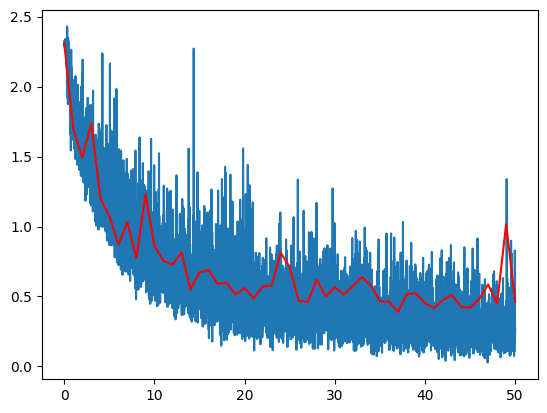

In [ ]:
#Curva de de loss
x_axis = np.linspace(0, epochs, len(train_loss_hist))
plt.plot(x_axis, train_loss_hist)
plt.plot(test_loss_hist, color = 'red')

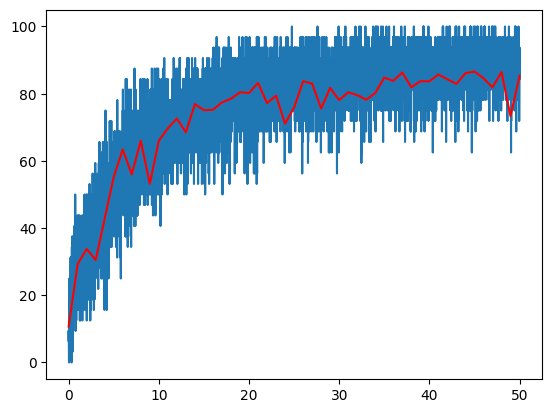

In [ ]:
#Curva de de acc
x_axis = np.linspace(0, epochs, len(train_acc_hist))
plt.plot(x_axis, train_acc_hist)
plt.plot(test_acc_hist, color = 'red')

Utilize os códigos acima para comparar os melhores modelos obtidos para cada arquitetura e, assim, faça um resumo das conclusões encontradas a partir dessas comparações.

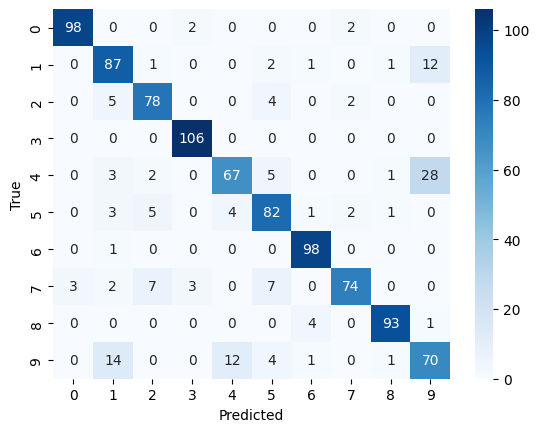

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       102
           1       0.76      0.84      0.79       104
           2       0.84      0.88      0.86        89
           3       0.95      1.00      0.98       106
           4       0.81      0.63      0.71       106
           5       0.79      0.84      0.81        98
           6       0.93      0.99      0.96        99
           7       0.93      0.77      0.84        96
           8       0.96      0.95      0.95        98
           9       0.63      0.69      0.66       102

    accuracy                           0.85      1000
   macro avg       0.86      0.85      0.85      1000
weighted avg       0.86      0.85      0.85      1000



In [ ]:
# Função de avaliação do modelo
def evaluate_model(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            preds = model(X).argmax(dim=1)
            all_preds.append(preds.cpu().numpy())
            all_labels.append(y.cpu().numpy())

    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)

    # Matriz de Confusão
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # report da classificacao
    print(classification_report(all_labels, all_preds))


# Avaliando o modelo no teste
evaluate_model(model, test_dataloader, device)


---
> Para a `LinearNet` (410 parâmetros) -> É uma arquitetura extremamente simples e rápida de treinar, ideal para problemas lineares ou como um ponto de partida para entender redes neurais. Com um número reduzido de parâmetros, é computacionalmente eficiente e roda muito rapidamente (sendo a mais rápida de todas as arquiteturas para 50 épocas). No entanto, sua simplicidade pode limitar sua capacidade de capturar padrões complexos nos dados, e ela não inclui técnicas avançadas de regularização. Mesmo utilizando weight_decay no otimizador, o resultado não foi como esperávamos. Rodou em 8.7s e alcançou 33% de ACC.

> Para a `MLP` (15.985 parâmetros) -> É uma arquitetura mais sofisticada e poderosa do que a LinearNet, sendo capaz de capturar padrões não lineares nos dados graças às suas camadas ocultas. Embora tenha mais parâmetros, continua sendo relativamente eficiente em termos computacionais.  Apesar de sua maior capacidade, ainda é suscetível ao overfitting, e mesmo com a aplicação de weight_decay no otimizador, o resultado não foi completamente satisfatório. Rodou em 19.4s e alcançou 63% de ACC.

> Para a `LeNet` (4860 parametros) -> É uma estrutura simples e fácil de entender e ensinar, computacionalmente eficiente (sendo a mais rapida dentre as 3 para 50 epocas),pois demanda menos poder computacional. Entretanto não possui técnicas de regularização avançadas, podendo se ajustar demais aos dados de treinamento gerando o overfitting. Rodou em 35s e alcançou 83% de ACC.


> Para a `VGG` (4860 parametros) -> Facilita a compreensão e a modificação da arquitetura, uma vez que, voce pode alterar os blocos isoladaemnte ou criar blocos "selhantes" para reutilizá-los. Assim como a LeNet, essa arquitetura tem o ganho na construção, mas não possui técnicas de regularização avançadas também. Rodou em 45s e alcançou 81% de ACC.


> Para a `ResNet` (7427 parametros) -> Por utilizar a tecnica de resíduo mitigam problemas de desvanecimento do gradiente, fazendo essas conexões residuais atuam como uma forma de regularização, melhorando a generalização do modelo. Porém, mais complexa e computacionalmente intensiva, sendo a que mais demorou no treinamento de 50 epocas (1min e 40s) e alcançou 85% de ACC.

> Para a `RecurrentNet` (3754 parametros) -> O modelo RecurrentNet é uma arquitetura de rede neural recorrente que utiliza a célula GRU (Gated Recurrent Unit) para processar sequências de dados. Com uma estrutura leve e eficiente, nossa RecurrentNet possui aproximadamente 4000 parâmetros, tornando-o computacionalmente eficiente. A rede é composta por uma camada GRU, seguida por uma camada de Batch Normalization, uma função de ativação ReLU e uma camada totalmente conectada. Essa estrutura permite que o modelo capture padrões temporais e não lineares nos dados, sem demandar um alto custo computacional. Durante os testes, o RecurrentNet rodou em 2 minutos e 17 segundos e alcançou uma acurácia de 84% nos dados de validação. Essa performance é competitiva quando comparada aos outros modelos analisados, como a LeNet (83% de acurácia) e a ResNet (85% de acurácia), demonstrando a eficácia do modelo RecurrentNet.

>Para a `ViTNet` (1018 parâmetros) -> A ViTNet utiliza a arquitetura Transformer, caracterizada por camadas de Atenção e camadas Feed Forward. Este modelo adiciona complexidade e aumenta a quantidade de parâmetros devido às múltiplas cabeças de atenção e as camadas Feed Foward. As camadas de Atenção permitem que o modelo foque em diferentes partes dos dados de entrada, enquanto as camadas Feed Forward ajudam no processamento e transformação dos dados. Adicionalmente, a ViTNet incorpora técnicas de normalização e conexões residuais (add&norm) para mitigar problemas de desvanecimento do gradiente, melhorando a estabilidade durante o treinamento. Tivemos um bom desempenho usando multiplas heads e camadas, além de camadas maiores. Porém ao diminuirmos o numero de parametros consideravelmente (10 mil), nossa acurácia também diminuiu, já que por ser uma arquiterura "grande" teve um impacto. No nosso teste, a ViTNet alcançou uma acurácia de 51%, Este desempenho sugere que, embora a ViTNet tenha potencial, a arquitetura mostra necessidade do  uso de mais parametros.
---






In [ ]:

# Dictionary to store history for each model
history_dict = {}

# Training and evaluating models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    history = model.fit(train_images, train_labels, epochs=EPOCHS, validation_data=(test_images, test_labels))
    
    # Saving history
    history_dict[model_name] = history.history

    # Plotting individual model loss and accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'{model_name} Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title(f'{model_name} Accuracy')
    plt.legend()
    
    plt.show()

# Plotting comparison of all models
plt.figure(figsize=(12, 4))

# Plotting loss comparison
plt.subplot(1, 2, 1)
for model_name, history in history_dict.items():
    plt.plot(history['val_loss'], label=f'{model_name} val_loss')
plt.title('Loss Comparison')
plt.legend()

# Plotting accuracy comparison
plt.subplot(1, 2, 2)
for model_name, history in history_dict.items():
    plt.plot(history['val_accuracy'], label=f'{model_name} val_acc')
plt.title('Accuracy Comparison')
plt.legend()

plt.show()
